<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_PythonOpenCV%5CTutorial_Opencv_Python_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLIP - Python OpenCV Tutorial

Created by Smart Sensor System Lab
2022-1
> modified 2022-4-17

## Preparation in Colab environment

### Loading Imaage file in Colab

Read more on how to load image file in Colab

https://ykkim.gitbook.io/dlip/dlip-installation-guide/ide/colab#loading-image-file-in-colab



> `cv.imshow()` is not available in Colab

In [ ]:
# Upload image file from local drive
#from google.colab import files
#uploaded=files.upload()

## Import OpenCV Library

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

---
## Open & Show Image File


### Option 1 (python): Using OpenCV imshow()
Python files running locally supports OpenCV  `cv.imshow()`

BUT, Notebook files such as Colab and Jupyter does NOT support  OpenCV  `cv.imshow()`

* CoLAB supports similar function called  `cv2_imshow()`.  

In [ ]:
# Import COLAB imshow() 
#from google.colab.patches import cv2_imshow as cv_imshow

# Load image
img = cv.imread('handonglogo.jpg')

# Show Image using colab imshow
#cv_imshow(img) 

### Option 2 (notebook): Using matplot  `plt.imshow()`
This method is recommended for showing images.  This tutorial will use matplotlib functions. 
> matplotlib에서 rgb 채널 순서가 다르다
* matplot:  R-B-G
* OpenCV:   G-B-R


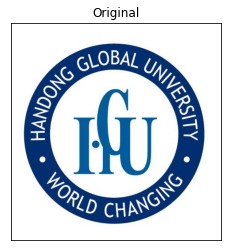

In [ ]:
# Load image
img = cv.imread('handonglogo.jpg')


# Show Image using matplotlib
# matplotlib에서 rgb 채널 순서가 다름
# matplot:  R-B-G
# OpenCV:   B-G-R
imgPlt = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(imgPlt),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

---
## Open WebCam ( *py only)
> cv.VideoCapture(0) is Not available in Colab


```python
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()

    cv2.imshow('frame',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()
```
---


## Spatial Filter

* Box filter
* Gaussian filter
* Median filter

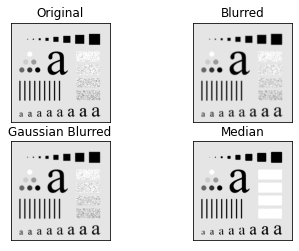

In [ ]:
# Load image
img = cv.imread('Pattern_original.tif')

# Spatial Filter
blur = cv.blur(img,(5,5))
gblur = cv.GaussianBlur(img,(5,5),0)
median = cv.medianBlur(img,5)

# Plot results
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gblur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

---
## Thresholding
[thresh()](https://docs.opencv.org/3.4.17/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

`Python:cv.threshold(src, thresh, maxval, type[, dst]) ->retval, dst`

### Manual Local Threshold

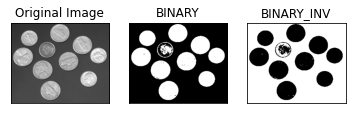

In [ ]:
# Open Image
img = cv.imread('coins.png',0)

thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thVal,255,cv.THRESH_BINARY_INV)

# Plot results
titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive  Threshold


`cv.adaptiveThreshold(	src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	) `

Example code

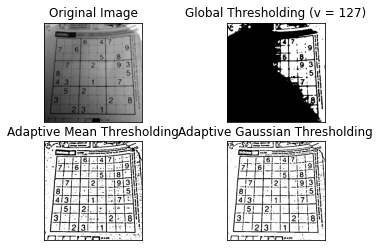

In [ ]:
# Read image
img = cv.imread('sudoku.jpg',0)

# Preprocessing
img = cv.medianBlur(img,5)

# Global threshold
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Local threshold
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

# Plot results
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Plot Histogram

```python
hist=cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]	)
```

Example Code

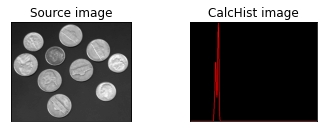

In [ ]:
# Open Image
img = cv.imread('coins.png',0)

histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
b_hist = cv.calcHist(img, [0], None, [histSize], histRange, False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

# Normalize histogram output
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)

# Plot Results
plt.subplot(2,2,1),plt.imshow(img, 'gray')
plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(histImage)
plt.title('CalcHist image')
plt.xticks([]),plt.yticks([])
plt.show()

## Morphology

Morphology: Erode, Dilate

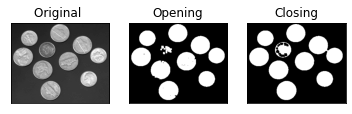

In [ ]:
# Open Image
src = cv.imread('coins.png',0)


# Threshold
ret,thresh1 = cv.threshold(src,127,255,cv.THRESH_BINARY)
img=thresh1

# Structure Element for Morphology
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
kernel = np.ones((5,5),np.uint8)

# Morphology
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)


# Plot results
titles = ['Original ', 'Opening','Closing']
images = [src, opening, closing]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

---
## Color Segmentation (InRange)

[inRange()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

` dst= cv2.inRange(src, lowerb, upperb, dst=None)`

Example code

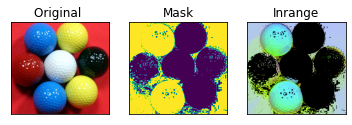

In [ ]:
# Open Image in RGB
img = cv.imread('color_ball.jpg')

# Convert BRG to HSV 
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# matplotlib: cvt color for display
imgPlt = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Color InRange()
lower_range = np.array([100,128,0])
upper_range = np.array([215,255,255])
dst_inrange = cv.inRange(hsv, lower_range, upper_range)

# Mask selected range
mask = cv.inRange(hsv, lower_range, upper_range)
dst = cv.bitwise_and(hsv,hsv, mask= mask)

# Plot Results
titles = ['Original ', 'Mask','Inrange']
images = [imgPlt, mask, dst]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


___
## Edge & Line & Circle Detection



### Edge Detection

Example code


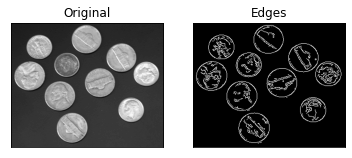

In [ ]:
img = cv.imread('coins.png',0)
thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)

# Canny Edge Detection
edges = cv.Canny(img,100,200)

# Plot Results
#cv.imshow('Edges',edges)
titles = ['Original','Edges']
images = [img, edges]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Circle Detection
Example code

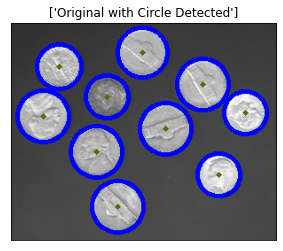

In [ ]:
# Read Image
src = cv.imread('coins.png')

# Convert it to grayscale:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


# Reduce noise and avoid false circle detection
gray = cv.medianBlur(gray, 5)


# Hough Circle Transform
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

# Draw circle
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # Draw circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # Draw circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 0), 3)


# Plot images
titles = ['Original with Circle Detected']
srcPlt=cv.cvtColor(src,cv.COLOR_BGR2RGB)
plt.imshow(srcPlt)
plt.title(titles)
plt.xticks([]),plt.yticks([])
plt.show()

### Line Detection
Example code

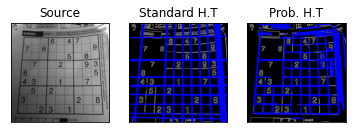

In [ ]:
# Load image
img = cv.imread('sudoku.jpg',0)  # Gray scale image

# Canny Edge Detection
dst = cv.Canny(img, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

# (Option 1) HoughLines
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# (Option 2) HoughLinesP
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)



# Plot Results
titles = ['Source','Standard H.T','Prob. H.T']
images = [img, cdst, cdstP]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()